In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits

data = pd.read_csv('resultados_ESTANDAR.csv')

In [37]:
path =r"C:/Users/Alexander/Downloads/Practicas/SCIENCE/2022-05-13/"
airmass = pd.DataFrame(columns={'image','airmass'}, index=None)
for j in data['image']:
    ma = '0'+str(j)
    
    if j <100 :
        ma = '00'+str(j)
    if j <10 :
        ma = '000'+str(j)
    hdu = fits.open(path+'TRES1b-'+ma+'_gSDSS.fit')[0]
    header = hdu.header
    airmass = airmass.append({'image':ma,'airmass':header['AIRMASS']}, ignore_index=True)
print(airmass)

     date image   airmass
0     NaN  0001  1.907577
1     NaN  0004  1.888511
2     NaN  0005  1.882207
3     NaN  0006  1.875943
4     NaN  0007  1.869724
5     NaN  0008  1.863701
6     NaN  0009  1.857572
7     NaN  0015  1.821864
8     NaN  0018  1.804511
9     NaN  0019  1.798948
10    NaN  0020  1.793285
11    NaN  0021  1.787664
12    NaN  0030  1.739078
13    NaN  0033  1.723466
14    NaN  0040  1.688517
15    NaN  0044  1.669151
16    NaN  0046  1.659779
17    NaN  0047  1.655083
18    NaN  0048  1.650419
19    NaN  0049  1.645786
20    NaN  0050  1.641184
21    NaN  0051  1.636614
22    NaN  0052  1.632184
23    NaN  0053  1.627674
24    NaN  0055  1.618743
25    NaN  0057  1.610038
26    NaN  0058  1.605675
27    NaN  0059  1.601342
28    NaN  0060  1.597037
29    NaN  0061  1.592760
..    ...   ...       ...
317   NaN  0375  1.018135
318   NaN  0376  1.017706
319   NaN  0377  1.017282
320   NaN  0378  1.016864
321   NaN  0379  1.016452
322   NaN  0380  1.016056
323   NaN  0

In [38]:
result = pd.concat([data, airmass], axis=1, join="inner")

print(result)

     Unnamed: 0                  y                  x image      flux_e  \
0             0  954.036214513 pix  1000.99618075 pix     1  356.257557   
1             1  954.294620017 pix  1000.07070803 pix     4  354.134897   
2             2  953.766476121 pix  999.494644475 pix     5  352.463381   
3             3  954.196084935 pix   998.00618137 pix     6  347.332587   
4             4  954.687035723 pix  998.752888804 pix     7  347.855592   
5             5  954.377936862 pix  998.518171718 pix     8  342.055921   
6             6  954.081627628 pix  997.931838791 pix     9  342.433200   
7             7  955.219144792 pix  998.040188966 pix    15  365.177838   
8             8  955.983799732 pix  996.909877203 pix    18  375.854802   
9             9  955.661018254 pix  996.195477931 pix    19  376.181340   
10           10  955.915992731 pix  996.006832895 pix    20  379.346926   
11           11  955.981754556 pix  996.621554794 pix    21  381.369595   
12           12  957.8698

Estimated coefficients:
Punto cero = -754765.901777 52082.4907393     
Coeficiente = 1227144.84705 64872.3349446


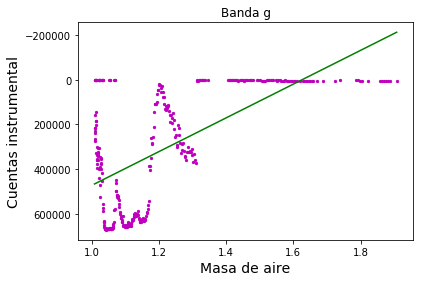

In [54]:
#LINEAR REGRESSION AND PLOT
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

def func(x, a, b):
    return a*x +b

def estimate_coef(x, y, title):
    yerr = np.array([0.001,0.001,0.001])
    popt, pcov = curve_fit(func, x, y)
    perr = np.sqrt(np.diag(pcov))

    return (popt[0], perr[0],popt[1] , perr[1])
def plot_regression_line(x, y, b, title):

    plt.scatter(x, y, color = "m",
    marker = "o", s = 5)
    #plt.errorbar(x, y, yerr = yerr, fmt = '.')
    y_pred = b[2] + b[0]*x

    plt.plot(x, y_pred, color = "g")

    plt.xlabel('Masa de aire', fontsize=14)
    plt.ylabel('Cuentas instrumental', fontsize=14)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.savefig(title+'.png')

    plt.show()

# observations / data
#BANDA G
y = result['flux']
x = result['airmass']
yerr=np.array([0.000,0.000,0.000])

# estimating coefficients
b = estimate_coef(x, y, "Banda g")
print("Estimated coefficients:\nPunto cero = {} {} \
    \nCoeficiente = {} {}".format(b[0], b[1], b[2], b[3]))

# plotting regression line
plot_regression_line(x, y, b,"Banda g")